# **Brief Information About Hotel Building Price Dataset**
Here, "Hotel Prices" does not refer to the cost of spending a night at those hotels but the price for buying them. This dataset would be used for those who wants to buy a hotel and needs to judge whether he/she is overpaying or getting a great deal depending on similar objects in other comparable cities.

There are 4 initial columns in this dataset:

1. Profit (How much money does this hotel make in a year),

2. Price in Millions (€),

3. Square Meter (Hotel Area),

4. City,


And 2 additional columns added as requirement for data visualization, these are:

1. Square Meter Category,

2. Price/Earning.

# **Import Library**

In [ ]:
#import data analytics library
import pandas as pd
import numpy as np

#import data visualization library
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [ ]:
hotel = pd.read_csv('/content/drive/MyDrive/hotels.csv')
hotel

,Profit,Price in Millions,Square Meter,City
0,119000.0,21.88,3938.0,Berlin
1,250000.0,27.95,3986.0,Munich
2,250000.0,16.09,2574.0,Cologne
3,145000.0,27.58,4155.0,Munich
4,110000.0,23.76,3795.0,Berlin
...,...,...,...,...
145,45000.0,10.50,1775.0,Cologne
146,250000.0,23.80,4058.0,Cologne
147,32000.0,12.86,1668.0,Berlin
148,35000.0,15.80,2281.0,Berlin


Adding new column:
1. Square Meter Category : Grouping 'Square Meter' column into 3 groups (< 2000, 2000 - 4000, and > 4000),

2. Price/Earning : Create Price/Profit ratio by dividing 'Price in Millions' / 'Profit' columns.

In [ ]:
hotel['Square Meter Category'] = ['< 2000' if a < 2000 else ('2000 - 4000' if a >= 2000 and a <= 4000 else '> 4000') 
                                  for a in hotel['Square Meter']]
hotel['Price/Earning'] = (hotel['Price in Millions']*1000)/hotel['Profit']
print(hotel)

       Profit  Price in Millions  ...  Square Meter Category Price/Earning
0    119000.0              21.88  ...            2000 - 4000      0.183866
1    250000.0              27.95  ...            2000 - 4000      0.111800
2    250000.0              16.09  ...            2000 - 4000      0.064360
3    145000.0              27.58  ...                 > 4000      0.190207
4    110000.0              23.76  ...            2000 - 4000      0.216000
..        ...                ...  ...                    ...           ...
145   45000.0              10.50  ...                 < 2000      0.233333
146  250000.0              23.80  ...                 > 4000      0.095200
147   32000.0              12.86  ...                 < 2000      0.401875
148   35000.0              15.80  ...            2000 - 4000      0.451429
149   90000.0              17.09  ...            2000 - 4000      0.189889

[150 rows x 6 columns]


**Create descriptive analytics for hotel area ('Square Meter' Column) in Each City**

In [ ]:
#Descriptive Statistics for Hotel Area In Berlin
hotel_berlin = hotel.loc[hotel['City'] == 'Berlin'].filter(items = ['Square Meter'])
print(hotel_berlin.describe().round(2))

       Square Meter
count         48.00
mean        2589.96
std         1451.69
min          114.00
25%         1649.50
50%         2630.00
75%         3729.75
max         5607.00


In [ ]:
#Descriptive Statistics for Hotel Area In Cologne
hotel_cologne = hotel.loc[hotel['City'] == 'Cologne'].filter(items = ['Square Meter'])
print(hotel_cologne.describe().round(2))

       Square Meter
count         61.00
mean        2655.18
std         1419.73
min          179.00
25%         1581.00
50%         2574.00
75%         3558.00
max         5741.00


In [ ]:
#Descriptive Statistics for Hotel Area In Munich
hotel_munich = hotel.loc[hotel['City'] == 'Munich'].filter(items = ['Square Meter'])
print(hotel_munich.describe().round(2))

       Square Meter
count         41.00
mean        2510.20
std         1467.18
min           82.00
25%         1492.00
50%         2501.00
75%         3306.00
max         5702.00


# **Data Visualization**
1. Pivot Table
2. Histogram
3. Boxplot
4. Scatter Plot
5. Line Chart
6. Pie Chart
7. Bar Chart


## **1. Pivot Table**

This pivot table shows the summary of the dataset that includes the minimum, maximum, and average for columns : Price in Milions, Profit, Price/Earning; 

and count for Square Meter Category column.

In [ ]:
hotel_summary = pd.pivot_table(hotel, values = ['Profit', 'Price in Millions', 'Square Meter Category', 'Price/Earning'], index = ['City', 'Square Meter Category'], aggfunc = {'Profit':[min, max, np.mean],
                                'Price in Millions':[min, max, np.mean], 'Square Meter Category':['count'], 'Price/Earning': [np.mean]}).round(2)
hotel_summary

Price in Millions  ... Square Meter Category
                                            max  ...                 count
City    Square Meter Category                    ...                      
Berlin  2000 - 4000                       23.82  ...                    23
        < 2000                            14.11  ...                    18
        > 4000                            31.79  ...                     7
Cologne 2000 - 4000                       20.86  ...                    31
        < 2000                            13.86  ...                    20
        > 4000                            28.49  ...                    10
Munich  2000 - 4000                       27.95  ...                    17
        < 2000                            19.32  ...                    17
        > 4000                            35.35  ...                     7

[9 rows x 8 columns]

## **2. Histogram**
This histogram shows the data distribution central tendency, and skewness score according to hotel area in each city.

skewness:  0.026503637255809443


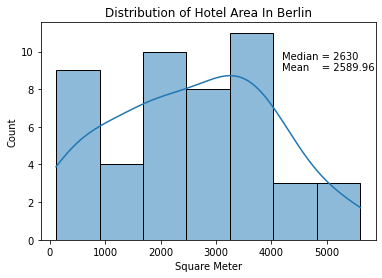

skewness:  0.2796023466501515


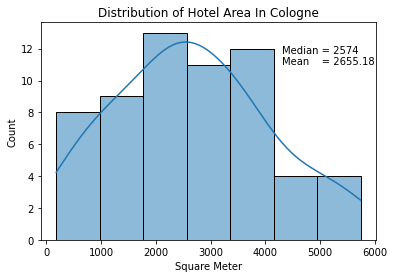

skewness:  0.3913001946029544


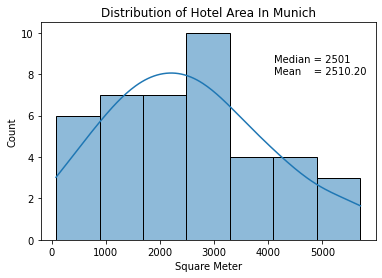

In [ ]:
#Create Histogram for Distribution of Hotel Area In Berlin
berlin_sqm = hotel['Square Meter'].loc[hotel['City']== 'Berlin']
sns.histplot(data=berlin_sqm, kde=True )

print('skewness: ', berlin_sqm.skew())
plt.text(4200, 9, 'Median = 2630 \nMean    = 2589.96', fontsize=10)
plt.title("Distribution of Hotel Area In Berlin")
plt.show()

#Create Histogram for Distribution of Hotel Area In Cologne
cologne_sqm = hotel['Square Meter'].loc[hotel['City']== 'Cologne']
sns.histplot(data=cologne_sqm, kde=True )

print('skewness: ', cologne_sqm.skew())
plt.text(4300, 11, 'Median = 2574 \nMean    = 2655.18', fontsize=10)
plt.title("Distribution of Hotel Area In Cologne")
plt.show()

#Create Histogram for Distribution of Hotel Area In Munich
munich_sqm = hotel['Square Meter'].loc[hotel['City']== 'Munich']
sns.histplot(data=munich_sqm, kde=True )

print('skewness: ', munich_sqm.skew())
plt.text(4100, 8, 'Median = 2501 \nMean    = 2510.20', fontsize=10)
plt.title("Distribution of Hotel Area In Munich")
plt.show()

From histogram above, we can see that the data distribution central tendency of hotel area in each city is quite normal distributed since the median and mean value is close.

## **3. Boxplot**

Visually shows the central tendency (skewness) of hotel area (Square Meter) in each city.

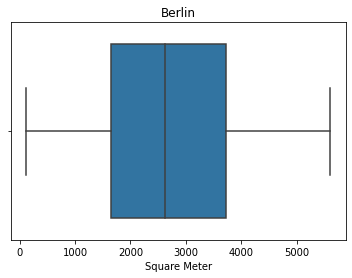

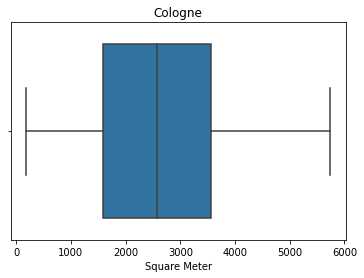

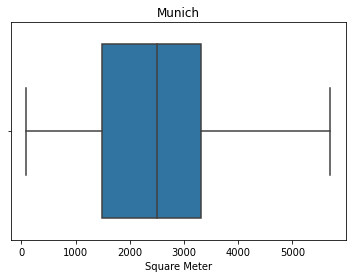

In [ ]:
#Berlin
sns.boxplot(data=hotel.loc[hotel['City'] == 'Berlin'], x = 'Square Meter')
plt.title("Berlin")
plt.show()

#Cologne
sns.boxplot(data=hotel.loc[hotel['City'] == 'Cologne'], x = 'Square Meter')
plt.title("Cologne")
plt.show()

#Munich
sns.boxplot(data=hotel.loc[hotel['City'] == 'Munich'], x = 'Square Meter')
plt.title("Munich")
plt.show()

From boxplot above, we can see that **Berlin** is quite normal distributed data while **Cologne & Munich** is slightly to the left side which indicates they have the tendency to have **right skewness**. 

And from this boxplot we know that there is no **outliers** in this dataset.

## **4. Scatter Plot**
This scatter plot shows us whether there is any pattern that occured for price and profit variable in each city.

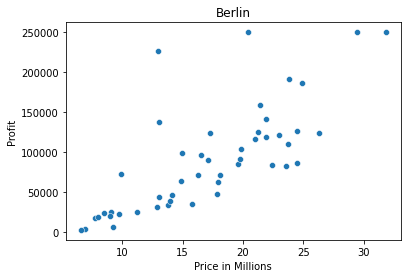

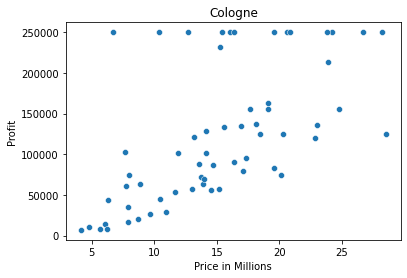

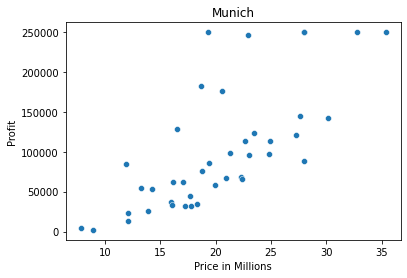

In [ ]:
#Berlin
sns.scatterplot(data=hotel.loc[hotel['City'] == 'Berlin'], x = 'Price in Millions', y = 'Profit')
plt.title("Berlin")
plt.show()

#Cologne
sns.scatterplot(data=hotel.loc[hotel['City'] == 'Cologne'], x = 'Price in Millions', y = 'Profit')
plt.title("Cologne")
plt.show()

#Munich
sns.scatterplot(data=hotel.loc[hotel['City'] == 'Munich'], x = 'Price in Millions', y = 'Profit')
plt.title("Munich")
plt.show()

From scatter plot above, we can see that there is a positive pattern which as the price increasing, so does the profit that could be earned.

## **5. Heatmap**
This heatmap will show us whether any correlation between two certain variables.

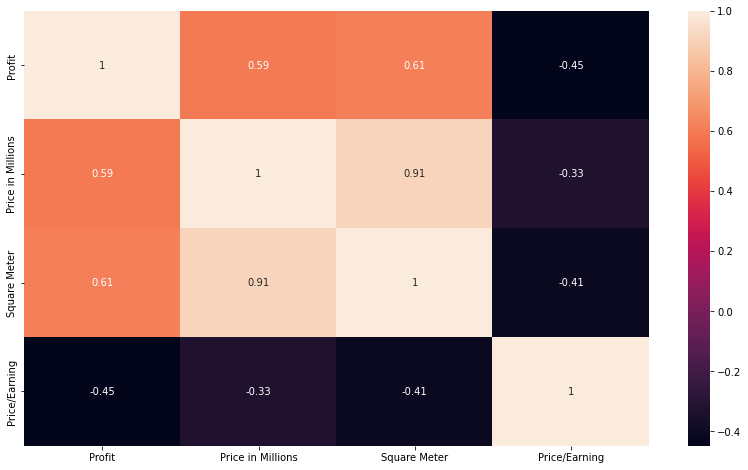

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(hotel.corr(), annot=True)
plt.show()

From heatmap above, we can see that there is a positive correlation between :
1. Price in Millions and Square Meter (value = **0.91**)
2. Profit and Square Meter (value = **0.61**)
3. Profit and Price in Millions (value = **0.59**)

## **6. Line Chart**
This line chart shows which city has the lowest and highest buy price and profit values.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


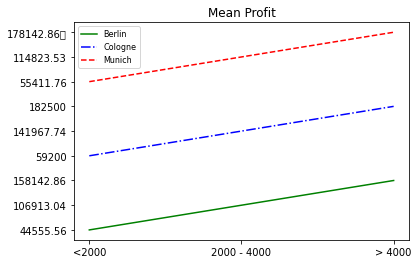

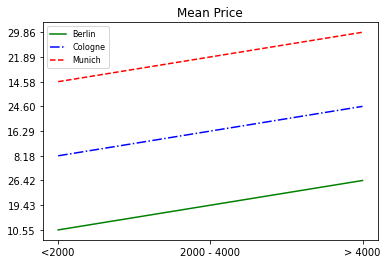

In [ ]:
#Create Line Chart for Mean Profit Values
x = ['<2000', '2000 - 4000', '> 4000']
y1 = ['44555.56', '106913.04', '158142.86']
y2 = ['59200', '141967.74', '182500']
y3 = ['55411.76', '114823.53', '178142.86	']

plt.plot( x, y1,  'g', label = 'Berlin', linestyle = '-')
plt.plot( x, y2,  'b', label = 'Cologne', linestyle = '-.')
plt.plot( x, y3,  'r', label = 'Munich', linestyle = '--')

plt.legend(['Berlin', 'Cologne', 'Munich'], fontsize = 8)
plt.title('Mean Profit')
plt.show()

#Create Line Chart for Mean Price Values
x = ['<2000', '2000 - 4000', '> 4000']
y1 = ['10.55', '19.43', '26.42']
y2 = ['8.18', '16.29', '24.60']
y3 = ['14.58', '21.89', '29.86']

plt.plot( x, y1,  'g', label = 'Berlin', linestyle = '-')
plt.plot( x, y2,  'b', label = 'Cologne', linestyle = '-.')
plt.plot( x, y3,  'r', label = 'Munich', linestyle = '--')

plt.legend(['Berlin', 'Cologne', 'Munich'], fontsize = 8)
plt.title('Mean Price')
plt.show()

From line chart above, we can see that **Berlin** has the **lowest** buy price and profit values,  while **Munich** has the **highest** buy price and profit values.

**7. Pie Chart**

This pie chart shows us the percentage of the hotel area category in each city.

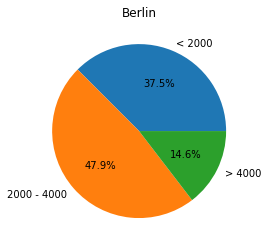

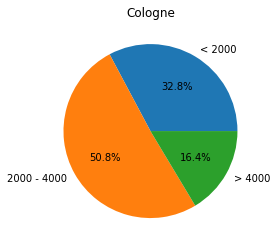

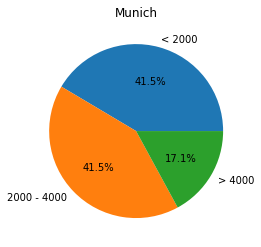

In [ ]:
#Create the display of Percentage Value function for Pie Chart
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

#Square Meter Category Percentage in Berlin
label = ['< 2000', '2000 - 4000', '> 4000']
data = [18, 23, 7 ]

plt.pie(data, labels = label, autopct = lambda pct: func(pct, data))
plt.title('Berlin')
plt.show()

#Square Meter Category Percentage in Cologne
label = ['< 2000', '2000 - 4000', '> 4000']
data = [20, 31, 10 ]

plt.pie(data, labels = label, autopct = lambda pct: func(pct, data))
plt.title('Cologne')
plt.show()

#Square Meter Category Percentage in Munich
label = ['< 2000', '2000 - 4000', '> 4000']
data = [17, 17, 7 ]

plt.pie(data, labels = label, autopct = lambda pct: func(pct, data))
plt.title('Munich')
plt.show()


## **8. Bar Chart**

Shows which city in each Square Meter Category (SMC) has the most profitable city indicated by Profit/Earning (P/E) ratio. 

The most profitable city for each SMC is the one that has **lowest P/E** (near zero).

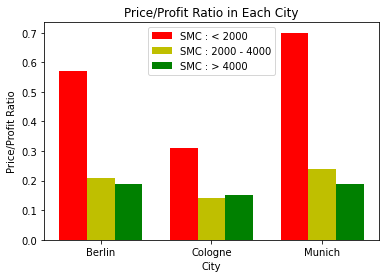

In [ ]:
#Bar chart positioning
N = 3
ind = np.arange(N) 
width = 0.25

#xvals = P/E mean in each city for SMC = < 2000
xvals = [0.57, 0.31, 0.70]
bar1 = plt.bar(ind, xvals, width, color = 'r')

#yvals = P/E mean in each city for SMC = 2000 - 4000  
yvals = [0.21, 0.14, 0.24]
bar2 = plt.bar(ind+width, yvals, width, color='y')

#zvals = P/E mean in each city for SMC = > 4000
zvals = [0.19, 0.15, 0.19]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'g')
  
plt.xlabel("City")
plt.ylabel("Price/Profit Ratio")
plt.title("Price/Profit Ratio in Each City")
  
plt.xticks(ind+width,['Berlin', 'Cologne', 'Munich'])
plt.legend((bar1, bar2, bar3), ('SMC : < 2000', 'SMC : 2000 - 4000', 'SMC : > 4000'))
plt.show()

From bar chart above, we can see that **Cologne City** has the **lowest P/E.** 

# **Summary**

From the data visualization, we can conclude that :

1. **Cologne City** has the most profitable hotel building in every aspect of Square Meter Category (SMC) since it has the **lowest P/E.**
2. Although as the buy price higher so does the profit values, it doesn't mean that it has the most profitable value.